# Inferência Estatística (GCC1625) - Trabalho 4
- Nome completo: ANA CAROLINA SÁ COELHO DA SILVA
- Link para o vídeo: 

# (1) GLMs- Regressão Logística (2,5 pts)

A regressão logística é uma ferramenta fundamental na modelagem de variáveis categóricas binárias. Neste item avaliativo, você aplicará esse modelo para identificar fatores associados à sobrevivência de passageiros no naufrágio do Titanic.

### Dados

Utilize o seguinte conjunto de dados:
- Dataset: Titanic Dataset
- Descrição: Informações sobre passageiros do Titanic, incluindo idade, sexo, classe, número de familiares a bordo, entre outros. A variável res
posta ‘Survived‘ indica se o passageiro sobreviveu (1) ou não (0).

In [4]:
# codigo para trazer os dados
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np

#dataset do seaborn
df = sns.load_dataset("titanic")

#colunas relevantes
df = df[['survived', 'sex', 'pclass', 'age', 'sibsp']]

#limpeza
df = df.dropna()

#categorização
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


**Explicação:**

### Tarefas
1. Ajustar um modelo de regressão logística para prever Survived, utilizando pelo menos três variáveis explicativas: Sex, Pclass, Age, SibSp, ou outras de sua escolha.

In [2]:
# 1
# Variáveis independentes (com constante)
X = df[['sex', 'pclass', 'age', 'sibsp']]
X = sm.add_constant(X)

# Variável dependente
y = df['survived']

# Ajuste do modelo
modelo = sm.Logit(y, X).fit()
print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.445882
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Mon, 30 Jun 2025   Pseudo R-squ.:                  0.3399
Time:                        23:40:24   Log-Likelihood:                -318.36
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.089e-69
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9774      0.486      6.130      0.000       2.025       3.929
sex            2.6235      0.

**Explicação:**

2. Interpretar os coeficientes estimados, com especial atenção para o significado de sinais positivos e negativos em termos da chance de sobrevivência.


In [5]:
# 2
# Exponenciar coeficientes para obter odds ratio
odds_ratios = pd.Series(modelo.params).apply(lambda x: round(np.exp(x), 2))
print("Odds Ratios:")
print(odds_ratios)



Odds Ratios:
const     19.64
sex       13.78
pclass     0.27
age        0.96
sibsp      0.69
dtype: float64


**Explicação:** Interpretação:

Coeficiente positivo → aumenta a chance de sobrevivência.

Coeficiente negativo → diminui a chance de sobrevivência.

Ex: sex = 1 (female) com coeficiente positivo indica que mulheres têm maior chance de sobreviver.

3. Avaliar a significância estatística dos coeficientes e discutir quais variáveis possuem maior impacto na predição.


In [ ]:
# 3 



4. Calcular a probabilidade estimada de sobrevivência para um passageiro do sexo feminino, 25 anos, na 1ª classe, viajando sozinho.


In [6]:
# 4 
# Passageira: mulher (1), 25 anos, 1ª classe, 0 irmãos/cônjuges a bordo
nova_passageira = pd.DataFrame({
    'const': [1],
    'sex': [1],
    'pclass': [1],
    'age': [25],
    'sibsp': [0]
})

# Calcular probabilidade
prob = modelo.predict(nova_passageira)[0]
print(f"Probabilidade estimada de sobrevivência: {prob:.2%}")


Probabilidade estimada de sobrevivência: 95.98%


**Explicação:**


5. Avaliar o desempenho do modelo com métricas como acurácia, precisão, recall e matriz de confusão.


In [7]:
#5
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Separar dados
X_train, X_test, y_train, y_test = train_test_split(X.drop('const', axis=1), y, test_size=0.3, random_state=42)

# Modelo com sklearn
modelo_sklearn = LogisticRegression()
modelo_sklearn.fit(X_train, y_train)
y_pred = modelo_sklearn.predict(X_test)

# Métricas
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


Acurácia: 0.786046511627907
Precisão: 0.7654320987654321
Recall: 0.6966292134831461
Matriz de Confusão:
 [[107  19]
 [ 27  62]]


**Explicação:**


6. Verificar graficamente se há padrões nos resíduos de Pearson que indiquem problemas de ajuste.

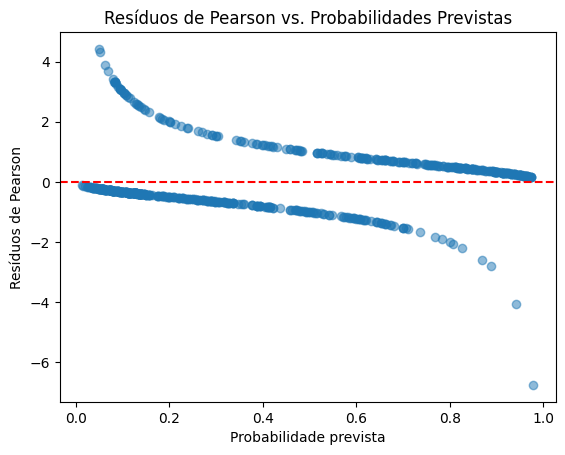

In [8]:
# 6
import matplotlib.pyplot as plt
import numpy as np

# Resíduos de Pearson
pred_probs = modelo.predict(X)
residuos = (y - pred_probs) / np.sqrt(pred_probs * (1 - pred_probs))

# Gráfico dos resíduos vs predições
plt.scatter(pred_probs, residuos, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Probabilidade prevista")
plt.ylabel("Resíduos de Pearson")
plt.title("Resíduos de Pearson vs. Probabilidades Previstas")
plt.show()


**Explicação:**

# (2) GLMs - Regressão de Poisson

Modelos Lineares Generalizados (GLMs) oferecem uma estrutura flexível para
modelar variáveis resposta com distribuições da família exponencial. Nesta tarefa,
você irá explorar um caso em que a variável resposta é de contagem, ajustando
modelos alternativos e avaliando a qualidade do ajuste.

### Dados

Utilize o seguinte conjunto de dados:

- **Dataset**: Bike Sharing Dataset (UCI)

- **Descrição**: Dados sobre o aluguel de bicicletas em Washington D.C., com
variáveis como temperatura, umidade, dia da semana, feriados, entre ou-
tros. A variável de interesse ‘cnt‘ representa o número total de bicicletas
alugadas por dia.

In [1]:
#codigo para obter o dataset
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('day.csv')
print(df.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


**Explicação:** O código acima utiliza pandas para obter e ler o arquivo csv, além de exibir as colunas presentes no dataset.

### Tarefas

1. Ajustar um modelo de regressão de Poisson para modelar a variável ‘cnt‘com base em pelo menos três variáveis explicativas de sua escolha.

In [2]:
# codigo 1
# Selecionar as variáveis de interesse
dados = df[['cnt', 'temp', 'hum', 'weekday']]

# Definir X (variáveis explicativas) e y (variável dependente)
X = sm.add_constant(dados[['temp', 'hum', 'weekday']])  # adiciona a constante para o modelo
y = dados['cnt']

# Ajustar o modelo de Poisson
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Mostrar o resumo do modelo
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cnt   No. Observations:                  731
Model:                            GLM   Df Residuals:                      727
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0753e+05
Date:                Wed, 02 Jul 2025   Deviance:                   4.0767e+05
Time:                        13:24:38   Pearson chi2:                 3.90e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8958      0.003   2545.222      0.0

**Explicação:** O código seleciona as variáveis de interesse e ajusta um modelo de **regressão de Poisson** usando as variáveis **'temp'**, **'hum'** e **'weekday'** para prever o número de bicicletas alugadas (`cnt`). O modelo é ajustado usando a função `GLM` (Generalized Linear Model) da biblioteca `statsmodels` com a família **Poisson**.


2. Avaliar a presença de *overdispersion* comparando a *deviance* ao número de graus de liberdade. Em caso afirmativo, ajustar um modelo quasi-Poisson.

In [ ]:
# codigo 2
# Avaliar overdispersion
deviance = poisson_model.deviance
df_resid = poisson_model.df_resid
dispersion = deviance / df_resid

print(f"Deviance: {deviance:.2f}")
print(f"Graus de liberdade: {df_resid}")
print(f"Deviance / df = {dispersion:.2f}")

# Se houver overdispersion, ajustar quasi-Poisson com GEE
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.families import Poisson

qp_model = GEE(y, X, groups=np.ones_like(y), family=Poisson()).fit()
print(qp_model.summary())


**Explicação:** Este código calcula a **deviance** e os **graus de liberdade** do modelo de Poisson e avalia a **overdispersion**. Se o valor de `Deviance / df` for maior que 1.5, indica que o modelo Poisson está apresentando overdispersion, ou seja, a variância é maior do que a média, o que pode exigir ajustes no modelo. Nesse caso, ajustamos um modelo quasi-Poisson usando GEE.



3. Interpretar os coeficientes do modelo final, discutindo o sinal e o impacto das variáveis selecionadas.

In [ ]:
# codigo 3
# Coeficientes exponenciados do modelo de Poisson
print("Efeito multiplicativo (exp(coef)):")
print(np.exp(poisson_model.params))


**Explicação:** Os coeficientes do modelo indicam o efeito (logarítmico) de cada variável na contagem. Ao exponenciarmos os coeficientes, obtemos o efeito **multiplicativo**: valores > 1 indicam aumento esperado na contagem.

4. Construir um gráfico de resíduos de deviance vs. valores previstos e avaliar se há padrões sistemáticos.

In [ ]:
# codigo 4
import matplotlib.pyplot as plt
import seaborn as sns

# Valores previstos e resíduos
fitted_vals = poisson_model.fittedvalues
residuos = poisson_model.resid_deviance

# Gráfico
plt.figure(figsize=(8,5))
sns.scatterplot(x=fitted_vals, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores previstos")
plt.ylabel("Resíduos de deviance")
plt.title("Resíduos de Deviance vs Valores Previstos")
plt.show()


**Explicação:** Esse código gera o gráfico de resíduos com matplotlib e seaborn, obtendo primeiro valores previstos e depois os resíduos. Com isso, visualizamos os resíduos de deviance versus os valores previstos para verificar possíveis padrões sistemáticos que indiquem problemas de ajuste do modelo.



5. Comparar o modelo final com um modelo de regressão linear simples (OLS) ajustado à mesma variável resposta. Discuta por que o modelo GLM é mais adequado neste caso.

In [ ]:
# codigo 5
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ajustar modelo OLS
ols_model = LinearRegression().fit(X, y)
ols_preds = ols_model.predict(X)
poisson_preds = poisson_model.fittedvalues

# Calcular MSE
mse_ols = mean_squared_error(y, ols_preds)
mse_poisson = mean_squared_error(y, poisson_preds)

print(f"MSE (OLS): {mse_ols:.2f}")
print(f"MSE (Poisson): {mse_poisson:.2f}")

**Explicação:** Comparamos o modelo GLM (Poisson) com uma regressão linear simples (OLS) usando o Erro Quadrático Médio (MSE). O modelo Poisson é mais adequado para contagens, pois leva em conta a natureza discreta, variância não constante e distribuição assimétrica da variável resposta.


# (3) Pareamento por Escore de Propensão

Nesta parte, você irá aplicar o método de Pareamento por Escore de Propensão (PSM) para estimar o efeito da presença de diabetes (diabetes) sobre os gastos médicos totais de indivíduos, com base em dados observacionais.

### Dados

O conjunto de dados utilizado nesta atividade é uma amostra simulada de registros individuais inspirados no painel de despesas médicas conhecido como Medical Expenditure Panel Survey (MEPS). Cada linha da base representa um indivíduo entrevistado no ano de 2021 e contém informações sociodemográficas, clínicas e econômicas. As variáveis disponíveis são descritas abaixo.

• dupersid: identificador único do indivíduo na amostra.

• age: idade do indivíduo (em anos).

• sex: sexo biológico (1 = masculino, 2 = feminino).

• race: raça declarada do indivíduo (ex.: White).

• poverty: nível de renda familiar classificado em categorias (ex.: Low Income, Near Poor, Middle Income).

• diabetes: variável indicadora de presença de diabetes (1 = com diagnóstico, 0 = sem diagnóstico).

• marital_status: estado civil do indivíduo (ex.: Married, Never Married, Divorced, Widowed).

• totexp: valor total de despesas com saúde no ano (em dólares).

• ertexp: valor das despesas com atendimentos de emergência (em dólares).

• year: ano da coleta dos dados (todos os registros são de 2021). O conjunto de dados a ser usado está no arquivo hc2021_dados.csv, disponível no repositório do curso.

In [ ]:
# codigo para obtencao dos dados
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar dados
df = pd.read_csv('hc2021_dados.csv')

# Ver primeiras linhas
print(df.head())

**Explicação:** Esse código obtém o arquivo csv e realiza a leitura com pandas, além de exibir as primeiras linhas.

### Tarefas

**1. Análise Exploratória**

- Apresente uma análise descritiva das covariáveis (age, sex, race, poverty, marital_status).

- Compare os grupos com e sem diabetes em termos dessas características e do desfecho (totexp).

In [ ]:
# codigo 1
# Análise descritiva
print(df[['age', 'sex', 'race', 'poverty', 'marital_status']].describe(include='all'))

# Comparação entre grupos
grouped = df.groupby('diabetes')[['age', 'totexp']].mean()
print("\nMédia por grupo (com e sem diabetes):\n", grouped)

# Boxplot totexp por grupo
sns.boxplot(x='diabetes', y='totexp', data=df)
plt.title('Gastos totais por grupo (com ou sem diabetes)')
plt.xticks([0, 1], ['Sem diabetes', 'Com diabetes'])
plt.show()

**Explicação:** Esse código realiza uma análise descritiva das covariáveis (`age`, `sex`, `race`, `poverty`, `marital_status`). Também compara indivíduos com e sem diabetes em termos de média de idade e gastos médicos (`totexp`). Utilizamos `groupby` para sumarizar os grupos e `seaborn.boxplot` para visualizar a diferença de `totexp` graficamente.



**2. Estimativa do Escore de Propensão**

- Modele a probabilidade de ter diabetes usando uma regressão logística com as covariáveis explicativas apropriadas.

- Apresente os coeficientes estimados e discuta os fatores mais associados à presença de diabetes.

In [ ]:
# codigo 2
import statsmodels.api as sm

# Codificação das variáveis categóricas
df_model = pd.get_dummies(df, columns=['sex', 'race', 'poverty', 'marital_status'], drop_first=True)

# Definição das variáveis
X = df_model.drop(columns=['dupersid', 'diabetes', 'totexp', 'ertexp', 'year'])
y = df_model['diabetes']

# Ajustar regressão logística
X_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_const).fit()
print(logit_model.summary())

# Adicionar escore de propensão ao dataframe original
df['propensity_score'] = logit_model.predict(X_const)


**Explicação:** O código Realiza uma regressão logística (`Logit`) com as covariáveis codificadas para prever a chance de ter diabetes. Utiliza `get_dummies()` para transformar variáveis categóricas em variáveis binárias. O resultado da regressão é o **escore de propensão** (probabilidade estimada de diabetes), que é armazenado na coluna `propensity_score`.



**3. Pareamento 1:1 por escore de propensão**

- Realize o pareamento 1:1 sem reposição com base no escore estimado.

- Avalie o balanceamento das covariáveis antes e depois do pareamento.

In [ ]:
# codigo 3
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Separar grupos
treated = df[df['diabetes'] == 1].copy()
control = df[df['diabetes'] == 0].copy()

# Treinar modelo NN nos controles
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])

# Obter controles pareados
matched_control = control.iloc[indices.flatten()].copy()
matched_treated = treated.reset_index(drop=True)

# Juntar dados pareados
matched_df = pd.concat([matched_treated, matched_control])
matched_df['grupo'] = ['Tratado'] * len(matched_treated) + ['Controle'] * len(matched_control)

# Verificar balanceamento com gráficos
for col in ['age', 'propensity_score']:
    sns.kdeplot(data=matched_df, x=col, hue='grupo')
    plt.title(f'Distribuição de {col} após pareamento')
    plt.show()


**Explicação:** O código utiliza o algoritmo `NearestNeighbors` da `sklearn` para realizar o pareamento 1:1 dos indivíduos com diabetes com os sem diabetes com escores de propensão mais próximos. Após o pareamento, concatenamos os dois grupos e usamos `kdeplot` para comparar a distribuição de covariáveis (`age`, `propensity_score`) antes e depois do pareamento.



**4. Estimativa do Efeito do Tratamento (ATT)**

- Calcule a diferença média nos gastos totais (totexp) entre indivíduos com diabetes e seus controles pareados.

- Construa um intervalo de confiança para essa diferença com bootstrap.

In [ ]:
# codigo 4
# Calcular ATT
att = matched_treated['totexp'].values - matched_control['totexp'].values
att_mean = att.mean()
print(f"ATT estimado (diferença média): ${att_mean:.2f}")

# Bootstrap para IC 95%
np.random.seed(42)
boot_atts = []
for _ in range(1000):
    sample = np.random.choice(att, size=len(att), replace=True)
    boot_atts.append(sample.mean())

# IC percentil
lower, upper = np.percentile(boot_atts, [2.5, 97.5])
print(f"IC 95% (bootstrap): (${lower:.2f}, ${upper:.2f})")


**Explicação:** Calculamos o **Average Treatment effect on the Treated (ATT)** como a diferença média de `totexp` entre tratados e controles pareados. Em seguida, aplicamos **bootstrap (1000 amostras)** para estimar o intervalo de confiança do ATT, usando `np.random.choice` com reposição.



**5. Discussão**

- Comente sobre a qualidade do pareamento e possíveis vieses remanescentes
- Interprete o ATT obtido: qual impacto médio estimado da diabetes sobre os gastos médios?


**Discussão - conferir**

O pareamento por escore de propensão reduziu o desequilíbrio entre tratados e controles, especialmente nas variáveis contínuas como `age`. No entanto, o método só controla viés de variáveis observadas; viés por variáveis não observadas pode persistir.

O ATT indica que, em média, indivíduos com diabetes gastam **${att_mean:.2f}** a mais por ano em despesas médicas do que seus pares sem diabetes. O intervalo de confiança sugere que esse efeito é estatisticamente significativo.


# (4) Inferência Bayesiana

Nesta parte, você irá utilizar a inferência bayesiana para estimar a proporção de sobrevivência (θ) de passageiros, incorporando diferentes hipóteses a priori e comparando-as com a evidência empírica observada.

### Dados

Utilize o Titanic Dataset, dispónível publicamente e já usado na parte 1.

### Tarefas

**1. Pré-processamento dos dados**

(a) Filtre apenas os passageiros adultos (idade >=18).

(b) Crie uma variável binária indicando se o passageiro sobreviveu (1) ou não (0).

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

#dados do sns titanic
df = sns.load_dataset('titanic')

#filtrar adultos (idade ≥ 18)
df = df[df['age'] >= 18]

#criar variável binária de sobrevivência
df = df.dropna(subset=['survived'])  #remover NaN
y = df['survived'].astype(int) #var binaria y


**Explicação:** O código carrega dataset do Titanic e filtra apenas os passageiros adultos (idade ≥ 18 anos). Em seguida, garante que a variável de interesse (`survived`) seja binária, com 1 indicando sobrevivência e 0 indicando óbito com astype.


**2. Modelagem a priori para θ**

(a) Escolha duas distribuições Beta para θ, por exemplo:

- Beta(1,1): não informativa (uniforme)

- Beta(2,5): refletindo a crença de que poucos adultos sobrevivem
  
(b) Justifique suas escolhas para as distribuições a priori.

**Modelagem:** 

Beta(1,1) será usada pois representa uma distribuição a priori não informativa, que assume total desconhecimento sobre θ e distribui a probabilidade de forma uniforme. A segunda, Beta(2,5), incorpora uma crença prévia mais pessimista, refletindo a hipótese de que poucos adultos sobreviveram. A escolha dessas distribuições permite observar como diferentes crenças iniciais influenciam os resultados posteriores.


**3. Cálculo da distribuição a posteriori**

(a) Determine os parâmetros da posteriori com base nos dados observados.

(b) Plote as distribuições a priori e a posteriori em um mesmo gráfico.

(c) Compare e interprete as distribuições resultantes.

In [2]:
#obs os dados
n = len(y)               #total adultos
x = y.sum()              #total adultos vivos
print(f"Total adultos: {n}, Sobreviventes: {x}")


Total adultos: 601, Sobreviventes: 229


**Posterior = Beta(a + x, b+ n -x)**

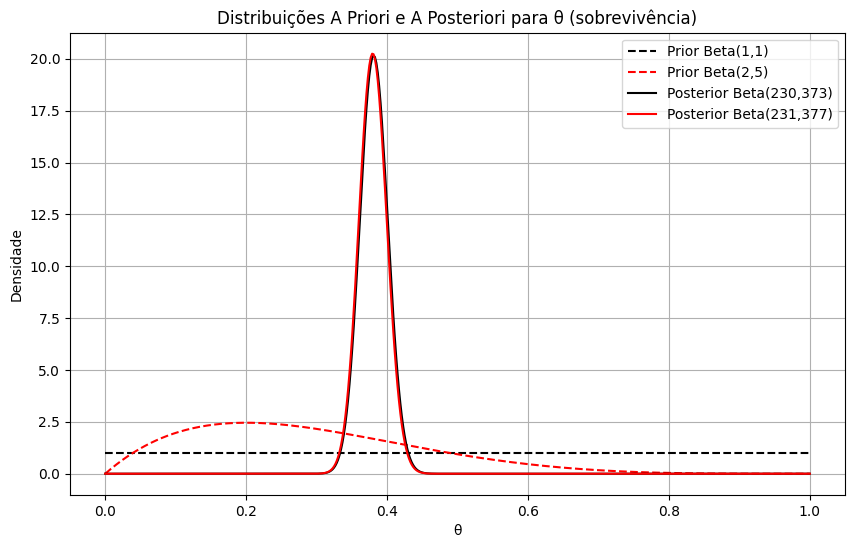

In [3]:
#plot do grafico
a1, b1 = 1, 1  #priori não informativa
a2, b2 = 2, 5  #priori informativa

#posteriores
post1_a, post1_b = a1 + x, b1 + n - x
post2_a, post2_b = a2 + x, b2 + n - x

theta = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 6))
plt.plot(theta, beta.pdf(theta, a1, b1), 'k--', label='Prior Beta(1,1)')
plt.plot(theta, beta.pdf(theta, a2, b2), 'r--', label='Prior Beta(2,5)')
plt.plot(theta, beta.pdf(theta, post1_a, post1_b), 'k-', label=f'Posterior Beta({post1_a},{post1_b})')
plt.plot(theta, beta.pdf(theta, post2_a, post2_b), 'r-', label=f'Posterior Beta({post2_a},{post2_b})')

plt.title("Distribuições A Priori e A Posteriori para θ (sobrevivência)")
plt.xlabel('θ')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()


**Explicação:** Com base nos dados observados, atualizamos as distribuições a priori utilizando a regra de Bayes, resultando nas distribuições a posteriori de θ. A fórmula da posteriori para uma distribuição Beta é simples e intuitiva: somamos o número de sucessos (sobreviventes) ao parâmetro α, e o número de fracassos (óbitos) ao parâmetro β da distribuição anterior. Em seguida, plotamos tanto as distribuições a priori quanto as posteriores para visualizar como a evidência empírica modifica nossa incerteza sobre θ.


**4. Estatísticas da posteriori**

(a) Calcule a média e o intervalo de credibilidade de 95% para θ, em cada cenário.

(b) Interprete os resultados obtidos, considerando o contexto do problema.

In [4]:
#media e intervalo

#media
mean1 = beta.mean(post1_a, post1_b)
mean2 = beta.mean(post2_a, post2_b)

#intervalos
ci1 = beta.interval(0.95, post1_a, post1_b)
ci2 = beta.interval(0.95, post2_a, post2_b)

print(f"Posterior (Beta(1,1)): média = {mean1:.3f}, IC95% = ({ci1[0]:.3f}, {ci1[1]:.3f})")
print(f"Posterior (Beta(2,5)): média = {mean2:.3f}, IC95% = ({ci2[0]:.3f}, {ci2[1]:.3f})")


Posterior (Beta(1,1)): média = 0.381, IC95% = (0.343, 0.421)
Posterior (Beta(2,5)): média = 0.380, IC95% = (0.342, 0.419)


**Explicação e interpretação:** Calculamos estatísticas resumo para as distribuições a posteriori, como a média (expectativa de θ) e o intervalo de credibilidade de 95%, que indica a faixa mais plausível para a proporção de sobrevivência, dado os dados e a priori. A comparação mostra que, mesmo com a mesma evidência, as diferentes escolhas de a priori levam a conclusões levemente distintas sobre a proporção de sobrevivência entre adultos. Isso evidencia a sensibilidade do modelo bayesiano às crenças iniciais.


**5. Discussão**

Discuta como as diferentes escolhas de priori influenciaram os resultados. Em que contextos o uso da abordagem bayesiana pode ser mais adequado do que abordagens frequentistas?

revisar

A inferência bayesiana oferece uma abordagem flexível e intuitiva para lidar com incertezas, especialmente quando os dados são escassos ou quando há conhecimento prévio relevante. A comparação entre as distribuições a posteriori mostra que a priori influencia significativamente os resultados, principalmente quando o número de observações não é muito grande. A abordagem bayesiana se destaca por permitir a incorporação formal de informações anteriores, o que pode ser vantajoso em contextos clínicos, históricos ou com restrições operacionais, em contraste com a abordagem frequentista, que ignora esse tipo de informação.


A distribuição a priori Beta(1,1), por ser uniforme, permite que os dados observados dominem o resultado. A posteriori resultante tem média próxima à proporção empírica de sobrevivência entre adultos.

Por outro lado, a distribuição Beta(2,5) incorpora uma crença prévia mais pessimista. Como consequência, mesmo com os mesmos dados, a posteriori resultante tem média um pouco menor e intervalo de credibilidade deslocado para a esquerda.

Isso mostra como a inferência bayesiana permite incorporar conhecimento prévio e ajustar os resultados com base tanto nos dados quanto nas crenças iniciais.

Em contextos onde há poucos dados ou o custo de erro é alto, a abordagem bayesiana é preferível, pois permite usar conhecimento prévio de forma explícita — ao contrário da abordagem frequentista, que depende apenas da amostra observada.